<a href="https://colab.research.google.com/github/vparro/controleAvancado/blob/master/Encontro_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelagem

Vamos analisar o sistema dinâmico correspondente a um tanque cuja alimentação ocorre na parte superior, por um sistema de bombeamento e esvaziamento por um orifício na base do tanque. Conforme obtivemos nas primeiras aulas, para uma geometria específica, regido pela equação diferencial apresentada em \ref{eq:01}.\footnote{A equação diferencial \ref{eq:01} corresponde a um tanque cilíndrico, com formato próximo ao formato de um refrigerante de 2 litros alimentado por uma bomba, semelhante ao de um sistema de carro.} Neste equação o variável $h(t)$ representa o nível de fluído no tanque e a variável $e_a(t)$ indica a tensão aplicada em um bomba de comportamento linear e dinâmica desprezível. Analisando a equação constatamos a presença de um termo não linear na Equação \ref{eq:01} que inviabiliza sua transformada de \textit{Laplace} diretamente - $ \sqrt{h(t)} $. Nesta equação temos: $A=78 \;cm^2$, $K_1=1.32\frac{cm^3}{sV}$ e $A_o \sqrt{2g} = 2.7 \frac{cm^{2.5}}{s}$ A Equação diferencial pode ser descrita em linguagem modelada de acordo com o diagrama ilustrado na Figura \ref{fig:01}. 

\begin{equation}
    78\frac{dh(t)}{dt}=1.32 e_a(t)-2.7\sqrt{h(t)}
\end{equation}

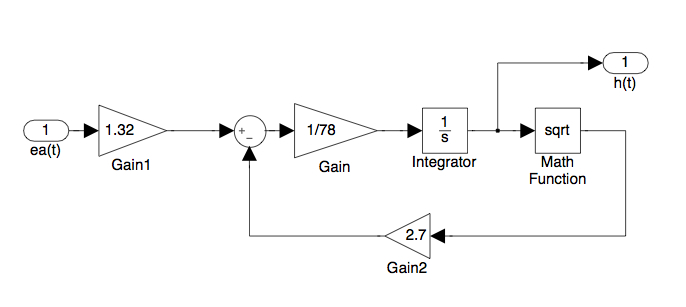

Supondo que desejamos controlar o nível $h(t)$ do tanque em torno de um ponto de interesse $h_0$, o estado estacionário (ponto de equilíbrio) corresponde a situação onde a vazão de entrada é idêntica a vazão de saída. Para obter esta condição, basta considerar o termo da derivada na Equação \ref{eq:01} como zero e obtemos uma relação governada pela Equação \ref{eq:02}. Com o uso apropriado da Equação \ref{eq:02} podemos obter qual a tensão pode estabilizar o nível em determinado valor e \textit{vice-versa}. Vale observar que existem infinitos pontos de equilíbrio limitados a altura física do tanque ($h_{max}$).

\begin{equation}
    1.32 e_{a0}=2.7\sqrt{h_0}
\end{equation}

Para podermos tratar o sistema em torno do ponto de interesse, devemos linearizar o termo não linear. Podemos utilizar a série de Taylor e truncar o valor no termo de primeira ordem resultando na Equação \ref{eq:03}.

\begin{align}
\begin{split}
 \sqrt{h(t)} \doteq \sqrt{h_0} + (h(t)-h_0) \frac{d\sqrt{h(t)}}{dt}\vert_{h_0},
\\
 \sqrt{h(t)} \doteq \sqrt{h_0} + (h(t)-h_0) \frac{1}{2\sqrt{h_0}}.
\end{split}
\end{align}

Substituindo \ref{eq:03} em \ref{eq:01} temos a equação linear modelada por \ref{eq:04}. Observe que quando substituímos o termo linear por sua aproximação obtemos exatamente uma parcela que corresponde a Equação\ref{eq:02}. Desta forma, se trocarmos o termo $2.7\sqrt{h_0}$ por $1.32 e_{a0}$ podemos estabelecer uma equação de variação, onde: $\Delta h(t) =h(t)-h_0$ e  $\Delta e_a(t) = e_a(t)-e_{a0}$. Observe também que: $\frac{d(h(t)-h_0)}{dt} = \frac{dh(t)}{dt} = \frac{\Delta h(t)}{dt} $ pois $h_0$ é uma constante na perspectiva desta análise.

\begin{align}
\begin{split}
78\frac{dh(t)}{dt}=1.32 e_a(t)-2.7\sqrt{h_0}-2.7((h(t)-h_0) \frac{1}{2\sqrt{h_0}}),
\\
78\frac{dh(t)}{dt}=1.32 e_a(t)-1.32 e_{a0}-2.7((h(t)-h_0) \frac{1}{2\sqrt{h_0}}),
\\
78\frac{d\Delta h(t)}{dt}=1.32 \Delta e_a(t)- \frac{2.7}{2\sqrt{h_0}} \Delta h(t).
\end{split}
\end{align}

Partindo do resultado obtido na manipulação apresentada em \ref{eq:04} pode-se facilmente obter a função de transferência do sistema em torno do ponto de equilíbrio escolhido $h_0$ e obtemos a Função de transferência descrita em \ref{eq:05}. O subscrito $\Delta$ que aparece nestas equações indica que trata-se de um modelo de desvios e não de um modelo para os valores absolutos. Um ponto importante é compararmos o comportamento entre o modelo linear e o modelo não linear em torno do ponto de operação $h_0$ (equilíbrio).

\begin{align}
\begin{split}
78 s H_{\Delta}(s)=1.32 E_{a\Delta}(s) - \frac{2.7}{2\sqrt{h_0}}H_{\Delta}(s),
\\
(78 s+ \frac{2.7}{2\sqrt{h_0}})H_{\Delta}(s)=1.32 E_{a\Delta}(s),
\\
\frac{H_{\Delta}(s)}{E_{a\Delta}(s)} = \frac{1.32}{(78 s+ \frac{2.7}{2\sqrt{h_0}})}.
\end{split}
\end{align}

Para simularmos ambos os sistema e compararmos o comportamento em torno de $h_0=6.5cm$ por exemplo, construímos o diagrama ilustrado na Figura \ref{fig:02}. Observe que a entrada de ambos os sistemas não é igual. Ao aplicarmos no modelo não linear uma tensão $e_{a1}$ corresponde a um desvio de $e_{a1} - \frac{2.7 \sqrt{6.5}}{1.32}$ aplicado no modelo linear, relação obtida pela Equação \ref{eq:02}. Outro aspecto é que a saída do modelo não linear oferece diretamente $h(t)$ e no caso do modelo linear temos o desvio, logo para obtermos o valor absoluto estimado precisamos adicionar $h_0=6.5$. Por último e não mesmo importante é a inicialização do integrador (Figura \ref{fig:01} com o valor estável em torno do ponto em que estamos estudando $h_0=6.5$.

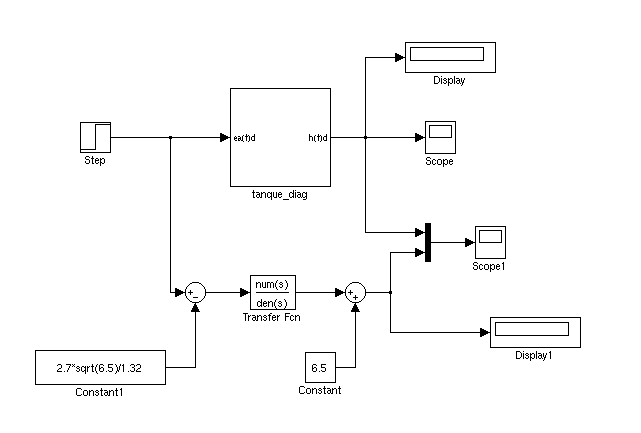

Após a comparação entre os modelos, podemos inferir limitações do mesmo e inseri-las para melhorar sua capacidade de previsão. Por exemplo, se aplicarmos $e_a(t)=1000V$ (\danger) o sistema aceitará e simulara a respectiva saída $h(t)$ que dependendo do valor pode chegar a quilômetros (\danger) o que é bastante improvável. Outro aspecto, natural é que as tensões são somente positivas na bomba, apesar do Matlab simular as tensões negativas, representando sucção de fluido, não é possível de obter fisicamente neste contexto sem mudar o atuador (Bomba). Adicionalmente o Matlab pode chegar a valores negativos de $h(t)$ o que também não faz sentido. A partir destas quatro observações concluímos que precisamos saturar tanto os valores de entrada em uma faixa $[e_{amin},e_{amax}]$ e a saída na faixa $[h_{min},h_{max}]$.

# Simulação malha aberta

# Controle malha fechada

## Controle em tempo contínuo

## Controle em tempo discreto

# Projeto do controlador

# Validação

# Referências